# import library

In [1038]:
import numpy as np
import pandas as pd

import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [1039]:
data = pd.read_csv('../data/train.csv', encoding = 'euc-kr')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1040]:
new_data = pd.read_csv('../data/test.csv', encoding = 'euc-kr')
new_data.head()
new_data.shape

(418, 11)

In [1041]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [1042]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [1043]:
data.shape

(891, 12)

In [1044]:
not_histogram_columns = ['PassengerId', 'Name', 'Ticket', 'Cabin']
data = data.drop(columns = not_histogram_columns)

new_data_id = new_data['PassengerId']
new_data = new_data.drop(columns = not_histogram_columns)

data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [1045]:
data.shape

(891, 8)

In [1046]:
data['Sex'] = data['Sex'].replace({'male':0, 'female':1})
new_data['Sex'] = new_data['Sex'].replace({'male':0, 'female':1})

data['Embarked'] = data['Embarked'].replace({'C':0, 'Q':1, 'S':2})
new_data['Embarked'] = new_data['Embarked'].replace({'C':0, 'Q':1, 'S':2})

C:\Users\user\AppData\Local\Temp\ipykernel_1488\1298063500.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Sex'] = data['Sex'].replace({'male':0, 'female':1})
C:\Users\user\AppData\Local\Temp\ipykernel_1488\1298063500.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_data['Sex'] = new_data['Sex'].replace({'male':0, 'female':1})
C:\Users\user\AppData\Local\Temp\ipykernel_1488\1298063500.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old beh

In [1047]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 55.8 KB


In [1048]:
data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,889.000000
mean,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,1.535433
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.792088
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


<Axes: xlabel='Fare'>

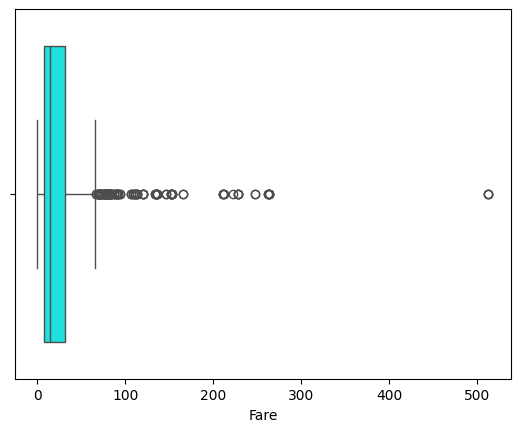

In [1049]:
sns.boxplot(x='Fare', data=data, color = 'cyan')

In [1050]:
count_over_200 = len(data[data['Fare'] > 200])
count_over_400 = len(data[data['Fare'] > 400])

print(count_over_200, count_over_400)

20 3


In [1051]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 23.0 KB


In [1052]:
data = data[data['Fare'] <= 400]

In [1053]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 888 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  888 non-null    int64  
 1   Pclass    888 non-null    int64  
 2   Sex       888 non-null    int64  
 3   Age       711 non-null    float64
 4   SibSp     888 non-null    int64  
 5   Parch     888 non-null    int64  
 6   Fare      888 non-null    float64
 7   Embarked  886 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 62.4 KB


In [1054]:
data = data.dropna(subset = ['Embarked'])

In [1055]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 886 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  886 non-null    int64  
 1   Pclass    886 non-null    int64  
 2   Sex       886 non-null    int64  
 3   Age       709 non-null    float64
 4   SibSp     886 non-null    int64  
 5   Parch     886 non-null    int64  
 6   Fare      886 non-null    float64
 7   Embarked  886 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 62.3 KB


In [1056]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 23.0 KB


In [1057]:
fare_median = new_data['Fare'].median()

new_data['Fare'] = new_data['Fare'].fillna(fare_median)

In [1058]:
df_cleaned = data.dropna()

X = df_cleaned.drop(columns=['Age', 'Survived'])
y = df_cleaned['Age']

model = LinearRegression()
model.fit(X, y)

X_missing = data[data['Age'].isnull()].drop(columns=['Age', 'Survived'])
predicted_age = model.predict(X_missing)
predicted_age = [max(0.0001, age) for age in predicted_age]

new_X_missing = new_data[new_data['Age'].isnull()].drop(columns=['Age'])
new_predicted_age = model.predict(new_X_missing)
new_predicted_age = [max(0.0001, age) for age in new_predicted_age]

data.loc[data['Age'].isnull(), 'Age'] = predicted_age
new_data.loc[new_data['Age'].isnull(), 'Age'] = new_predicted_age


In [1059]:
bins = [0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 99]
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
data['Age'] = pd.cut(data['Age'], bins = bins, labels = labels)
new_data['Age'] = pd.cut(new_data['Age'], bins = bins, labels = labels)

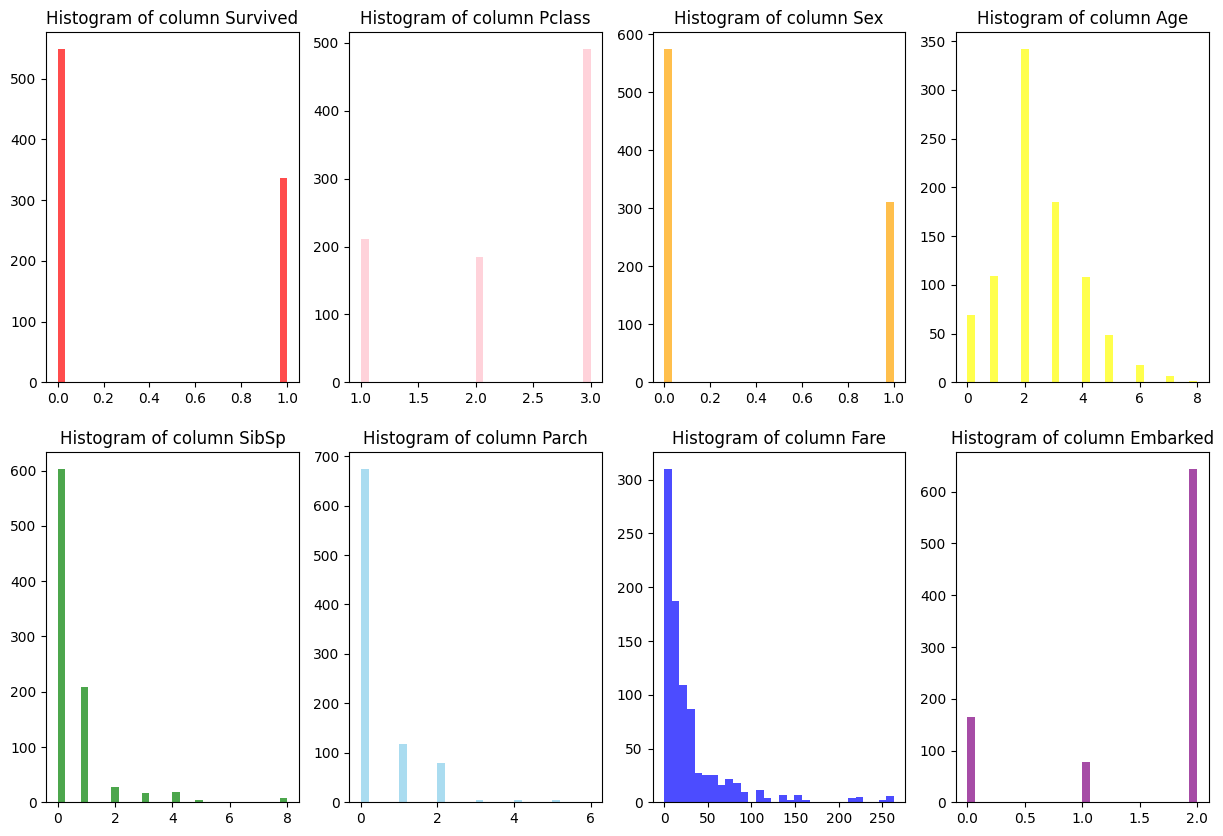

In [1060]:
fig = plt.figure(figsize = (15, 10))
color = ['red', 'pink', 'orange', 'yellow', 'green', 'skyblue', 'blue', 'purple', 'brown']

for i in range(data.shape[1]):
    ax = fig.add_subplot(2, 4, i+1)
    ax.hist(data.iloc[:, i], bins = 30, alpha = 0.7, color = color[i])
    ax.set_title(f'Histogram of column {data.columns[i]}')

In [1061]:
age_value_counts = data['Age'].value_counts()
age_value_counts

Age
2    342
3    185
1    109
4    108
0     69
5     48
6     18
7      6
8      1
9      0
Name: count, dtype: int64

In [1062]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 886 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  886 non-null    int64   
 1   Pclass    886 non-null    int64   
 2   Sex       886 non-null    int64   
 3   Age       886 non-null    category
 4   SibSp     886 non-null    int64   
 5   Parch     886 non-null    int64   
 6   Fare      886 non-null    float64 
 7   Embarked  886 non-null    float64 
dtypes: category(1), float64(2), int64(5)
memory usage: 56.6 KB


In [1063]:
data['Age'] = data['Age'].astype(int)
new_data['Age'] = new_data['Age'].astype(int)


In [1064]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    int32  
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    int64  
dtypes: float64(1), int32(1), int64(5)
memory usage: 21.4 KB


In [1065]:
data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000
mean,0.380361,2.316027,0.351016,2.458239,0.525959,0.382619,30.470611,1.540632
std,0.485750,0.832607,0.477557,1.394888,1.105151,0.807656,41.155721,0.788360
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,7.895800,1.000000
50%,0.000000,3.000000,0.000000,2.000000,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,3.000000,1.000000,0.000000,30.646850,2.000000
max,1.000000,3.000000,1.000000,8.000000,8.000000,6.000000,263.000000,2.000000


In [1066]:
scaling_column = ['Fare']

scaler = MinMaxScaler()

data[scaling_column] = scaler.fit_transform(data[scaling_column])
new_data[scaling_column] = scaler.fit_transform(new_data[scaling_column])


In [1067]:
data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000
mean,0.380361,2.316027,0.351016,2.458239,0.525959,0.382619,0.115858,1.540632
std,0.485750,0.832607,0.477557,1.394888,1.105151,0.807656,0.156486,0.788360
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.030022,1.000000
50%,0.000000,3.000000,0.000000,2.000000,0.000000,0.000000,0.054959,2.000000
75%,1.000000,3.000000,1.000000,3.000000,1.000000,0.000000,0.116528,2.000000
max,1.000000,3.000000,1.000000,8.000000,8.000000,6.000000,1.000000,2.000000


In [1068]:
new_data.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,0.363636,2.511962,0.447368,0.392344,0.069441,1.401914
std,0.841838,0.481622,1.330729,0.896760,0.981429,0.109012,0.854496
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,2.000000,0.000000,0.000000,0.015412,1.000000
50%,3.000000,0.000000,2.000000,0.000000,0.000000,0.028213,2.000000
75%,3.000000,1.000000,3.000000,1.000000,0.000000,0.061429,2.000000
max,3.000000,1.000000,7.000000,8.000000,9.000000,1.000000,2.000000


In [1069]:
survived_value_counts = data['Survived'].value_counts()
survived_value_counts

Survived
0    549
1    337
Name: count, dtype: int64

In [1070]:
sibsp_value_counts = data['SibSp'].value_counts()
parch_value_counts = data['Parch'].value_counts()

print(sibsp_value_counts)
print()
print(parch_value_counts)

SibSp
0    603
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

Parch
0    674
1    117
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


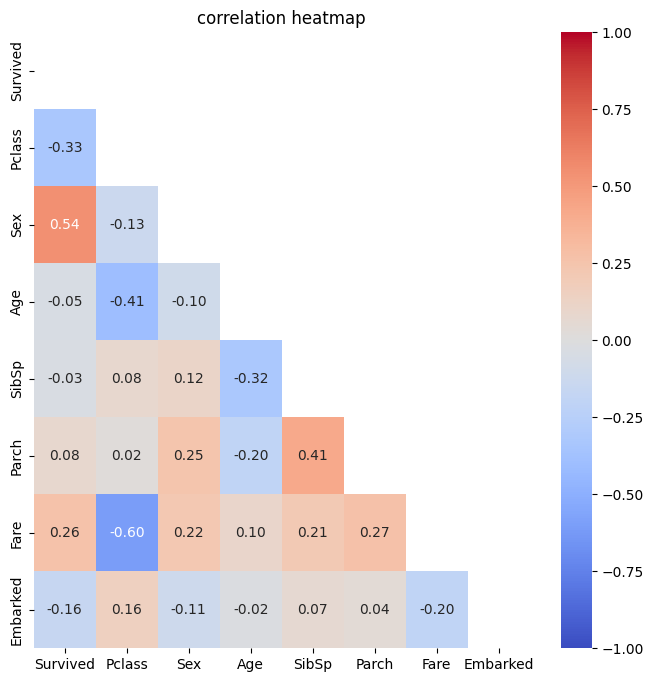

In [1071]:
corr_matrix = data.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype = bool))

plt.figure(figsize = (8, 8))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', mask = mask, fmt = '.2f', vmin = -1, vmax = 1)
plt.title('correlation heatmap')
plt.show()

In [1072]:
new_data.insert(0, 'PassengerId', new_data_id)

In [1073]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    int32  
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    int64  
dtypes: float64(1), int32(1), int64(6)
memory usage: 24.6 KB


In [1074]:
data.to_csv("../preprocessed_data/preprocessed_train.csv", index= False)
new_data.to_csv("../preprocessed_data/preprocessed_test.csv", index= False)

# 참조

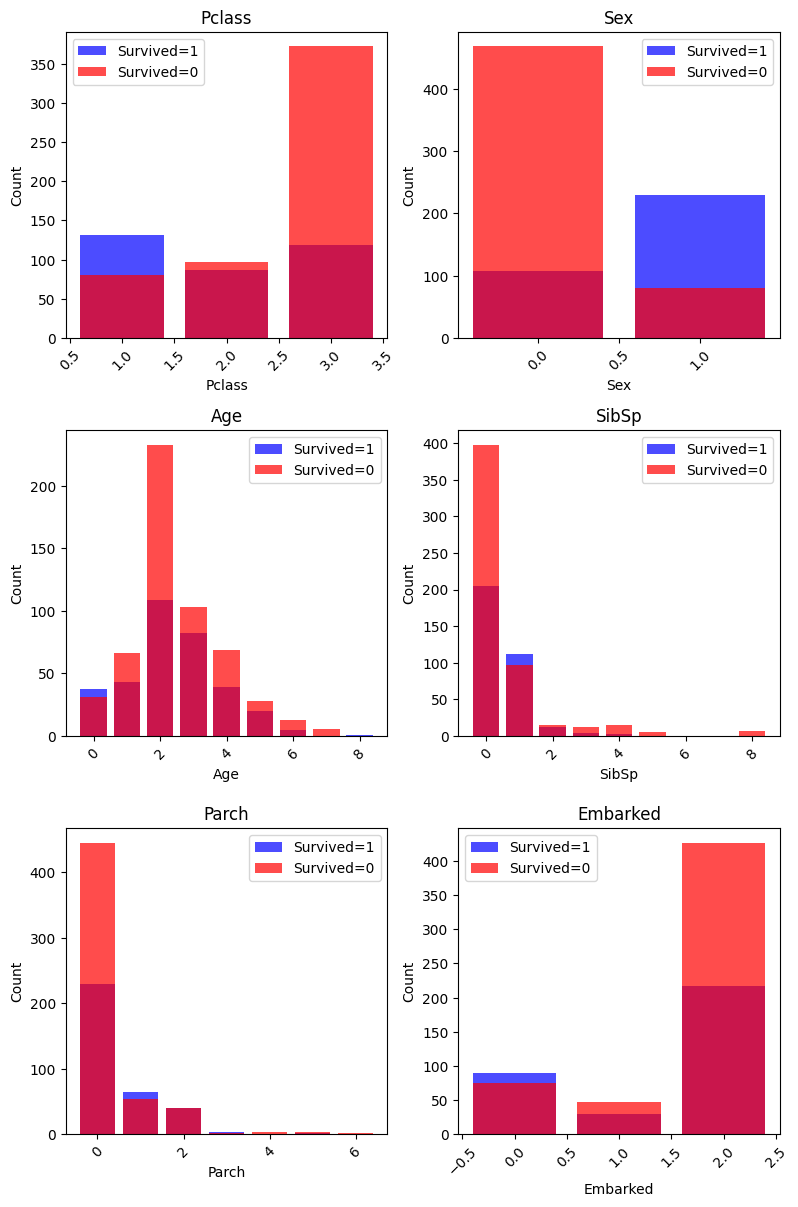

In [1075]:
fig = plt.figure(figsize=(8, 12))
plt_data_x = data.drop(columns=['Survived', 'Fare'])

for i in range(plt_data_x.shape[1]):
    ax = fig.add_subplot(3, 2, i + 1)

    # 각 변수별로 y=1일 때와 y=0일 때의 개수 계산
    variable_counts_y1 = data[data['Survived'] == 1].groupby(plt_data_x.columns[i]).size()
    variable_counts_y0 = data[data['Survived'] == 0].groupby(plt_data_x.columns[i]).size()

    # 그래프 그리기
    ax.bar(variable_counts_y1.index, variable_counts_y1.values, color='blue', alpha=0.7, label='Survived=1')
    ax.bar(variable_counts_y0.index, variable_counts_y0.values, color='red', alpha=0.7, label='Survived=0')

    ax.set_xlabel(plt_data_x.columns[i])
    ax.set_ylabel('Count')
    ax.set_title(f'{plt_data_x.columns[i]}')
    ax.legend()

    plt.xticks(rotation=45)  # x 축 눈금 라벨 회전 (필요시)

plt.tight_layout()
plt.show()